<div style="text-align: center;">
    <img src="https://score-more.com/wp-content/uploads/2023/09/Premier-League-fixtures-2023-2024.TEAMS_.jpg" alt="Image Description" style="width: 50%;"/>
</div>


## Libraries and Dependencies

In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb 
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay,classification_report
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

## Data Loading

In [92]:
df1=pd.read_csv(r"C:\Users\hp\Downloads\E0 (5).csv") #matches and stats of the 2020-2021 season 
df2=pd.read_csv(r"C:\Users\hp\Downloads\E0 (4).csv") #matches and stats of the 2020-2021 season 
df3=pd.read_csv(r"C:\Users\hp\Downloads\E0 (3).csv") #matches and stats of the 2020-2021 season 
df4=pd.read_csv(r"C:\Users\hp\Downloads\E0 (2).csv") #matches and stats of the 2020-2021 season 
df5=pd.read_csv(r"C:\Users\hp\Downloads\E0 (1).csv") #matches and stats of the current season(2024-2025 until the week 11)             

In [93]:
all_matches= pd.concat([df1, df2, df3,df4,df5], axis=0,ignore_index=True)

## Data Exploration

In [94]:
all_matches.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
all_matches.shape

(1630, 132)

In [96]:
all_matches.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       '1XBCH', '1XBCD', '1XBCA', 'BFECH', 'BFECD', 'BFECA', 'BFEC>2.5',
       'BFEC<2.5', 'BFECAHH', 'BFECAHA'],
      dtype='object', length=132)

## Data cleaning and handling missing values

In [97]:
all_matches.columns = [c.lower() for c in all_matches.columns]
#Let's reduce the columns 
cols=['div','date','time','hometeam','awayteam','fthg','ftag','ftr','hthg','htag','referee','hs','as','hst','ast','hf','hc','ac','hy','ay','hr','ar','b365h','bfh','iwh','psh','vch','bwh','whh']
all_matches=all_matches[cols]

In [98]:
all_matches.head()

,div,date,time,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,...,ay,hr,ar,b365h,bfh,iwh,psh,vch,bwh,whh
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,2,0,0,6.00,NaN,6.00,6.16,6.50,5.50,6.50
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1,0,0,3.10,NaN,3.15,3.32,3.20,3.00,3.20
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,0,0,0,1.28,NaN,1.35,1.31,1.30,1.26,1.27
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,2,0,0,2.15,NaN,2.15,2.18,2.15,2.15,2.15
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1,0,0,3.80,NaN,3.85,4.00,4.00,3.70,3.80


In [99]:
#Checking for null values in the data 
all_matches.isnull().sum()

div            0
date           0
time           0
hometeam       0
awayteam       0
fthg           0
ftag           0
ftr            0
hthg           0
htag           0
referee        0
hs             0
as             0
hst            0
ast            0
hf             0
hc             0
ac             0
hy             0
ay             0
hr             0
ar             0
b365h          0
bfh         1520
iwh          292
psh            0
vch          110
bwh            2
whh            0
dtype: int64

In [100]:
#We're drop 'bfh', 'iwh' and 'vch' and we gonna fill the empty values of bwh by the previous values
all_matches = all_matches.drop(columns=['bfh', 'iwh', 'vch'])
all_matches['bwh'] = all_matches['bwh'].fillna(method='ffill')
all_matches.isnull().sum()

div         0
date        0
time        0
hometeam    0
awayteam    0
fthg        0
ftag        0
ftr         0
hthg        0
htag        0
referee     0
hs          0
as          0
hst         0
ast         0
hf          0
hc          0
ac          0
hy          0
ay          0
hr          0
ar          0
b365h       0
psh         0
bwh         0
whh         0
dtype: int64

## Feature Engineering

In [101]:
# Categorical columns (hometeam, awayteam, referee) are encoded into numerical values using categorical codes 
all_matches['h_code'] = all_matches['hometeam'].astype('category').cat.codes
all_matches['a_code'] = all_matches['awayteam'].astype('category').cat.codes
all_matches['r_code']=all_matches['referee'].astype('category').cat.codes

In [102]:
all_matches.head()

,div,date,time,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,...,ay,hr,ar,b365h,psh,bwh,whh,h_code,a_code,r_code
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,2,0,0,6.00,6.16,5.50,6.50,9,0,4
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1,0,0,3.10,3.32,3.00,3.20,7,21,13
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,0,0,0,1.28,1.31,1.26,1.27,13,11,21
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,2,0,0,2.15,2.18,2.15,2.15,25,17,29
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1,0,0,3.80,4.00,3.70,3.80,24,12,3


In [103]:
# Converting the 'date' column to a datetime format for easier manipulation and analysis
all_matches["date"] = pd.to_datetime(all_matches["date"], format="%d/%m/%Y")

In [104]:
# Extracting the hour from the 'time' column, which contains match times in the format 'HH:MM'
# The str.replace() function is used to remove everything after the colon (':') including the minutes
all_matches['hour']=all_matches['time'].str.replace(':.+','',regex=True).astype('int')

In [105]:
# We create a binary target variable where:
# - 1 indicates that the home team won ('H')
# - 0 indicates that the home team did not win (a draw 'D' or a loss 'A')
all_matches['target']=(all_matches['ftr']=='H').astype('int')

In [106]:
all_matches.dtypes

div                 object
date        datetime64[ns]
time                object
hometeam            object
awayteam            object
fthg                 int64
ftag                 int64
ftr                 object
hthg                 int64
htag                 int64
referee             object
hs                   int64
as                   int64
hst                  int64
ast                  int64
hf                   int64
hc                   int64
ac                   int64
hy                   int64
ay                   int64
hr                   int64
ar                   int64
b365h              float64
psh                float64
bwh                float64
whh                float64
h_code                int8
a_code                int8
r_code                int8
hour                 int64
target               int64
dtype: object

## Data splitting 

In [107]:
len(all_matches[all_matches['date']>'2024-01-01'])/all_matches.shape[0]

0.17975460122699385

In [108]:
train=all_matches[all_matches['date']<'2024-01-01']
test=all_matches[all_matches['date']>'2024-01-01']

## Feature Selection 

In [109]:
#These predictors focus on both team-related features (home and away teams), the hour of the match, the referee, and various betting odds from different sources
predictors=['h_code','a_code','hour','r_code','b365h', 'bwh', 'psh', 'whh']

## Model Building with RandomForestClassifier

In [110]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [111]:
rf.fit(train[predictors],train['target'])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [112]:
rf_preds=rf.predict(test[predictors])

In [113]:
rf_accuracy=accuracy_score(test['target'],rf_preds)
rf_accuracy

0.7030716723549488

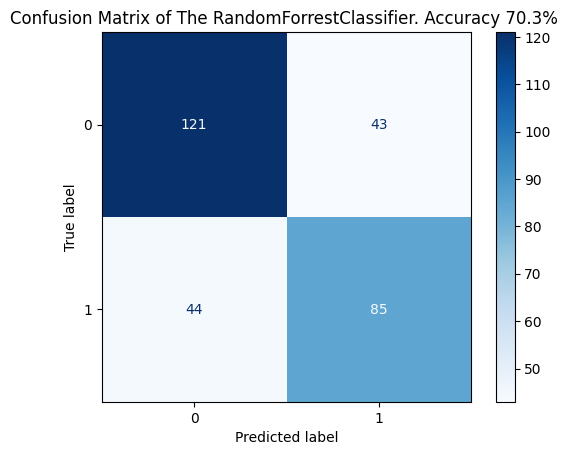

In [114]:
#Evaluating the model 
cm = confusion_matrix(test['target'], rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of The RandomForrestClassifier. Accuracy 70.3% ')
plt.show()

In [115]:
print("\nClassification Report:\n", classification_report(test['target'], rf_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       164
           1       0.66      0.66      0.66       129

    accuracy                           0.70       293
   macro avg       0.70      0.70      0.70       293
weighted avg       0.70      0.70      0.70       293



## Model Building with XGBoost Classifier

In [116]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=5, learning_rate=0.01, random_state=42)

In [117]:
xgb_clf.fit(train[predictors], train['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [118]:
xgb_preds=xgb_clf.predict(test[predictors])
xgb_accuracy=accuracy_score(test['target'],xgb_preds)
xgb_accuracy

0.6962457337883959

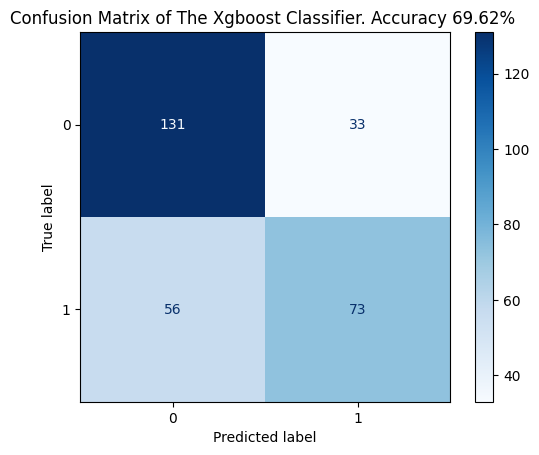

In [119]:
#Evaluating the model 
cm = confusion_matrix(test['target'], xgb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of The Xgboost Classifier. Accuracy 69.62% ')
plt.show()

In [120]:
print("\nClassification Report:\n", classification_report(test['target'], xgb_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       164
           1       0.69      0.57      0.62       129

    accuracy                           0.70       293
   macro avg       0.69      0.68      0.68       293
weighted avg       0.70      0.70      0.69       293



## Conclusion

**RandomForestClassifier** is the better choice if balanced performance across both classes is needed, such as for general reporting or analysis. It achieves higher recall for home wins (class 1) and slightly better overall F1-scores.

However, if the focus is on spotting unexpected outcomes such as predicting draws or away wins for betting or identifying surprising results, **XGBoost** is preferable. It performs better at predicting draws/away wins (class 0) with a higher recall for this class, with slightly lower performance for predicting home wins (class 1).

For this case, I will continue working with the **RandomForestClassifier**.


## Improving the performance of the RandomForestClassifier model

In [121]:
grouped_matches=all_matches.groupby('hometeam')
group=grouped_matches.get_group('Man City')
group

,div,date,time,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,...,ar,b365h,psh,bwh,whh,h_code,a_code,r_code,hour,target
24,E0,2020-09-27,16:30,Man City,Leicester,2,5,A,1,1,...,0,1.28,1.31,1.30,1.27,15,12,21,16,0
40,E0,2020-10-17,17:30,Man City,Arsenal,1,0,H,1,0,...,0,1.44,1.51,1.48,1.47,15,0,4,17,1
76,E0,2020-11-08,16:30,Man City,Liverpool,1,1,D,1,1,...,0,1.95,2.00,1.95,2.00,15,13,5,16,0
90,E0,2020-11-28,15:00,Man City,Burnley,5,0,H,3,0,...,0,1.16,1.18,1.18,1.17,15,5,16,15,1
99,E0,2020-12-05,15:00,Man City,Fulham,2,0,H,2,0,...,0,1.10,1.13,1.11,1.11,15,9,13,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,E0,2024-08-24,15:00,Man City,Ipswich,4,1,H,3,1,...,0,1.08,1.08,1.10,1.10,15,10,22,15,1
1555,E0,2024-09-14,15:00,Man City,Brentford,2,1,H,2,1,...,0,1.18,1.17,1.19,1.18,15,3,6,15,1
1569,E0,2024-09-22,16:30,Man City,Arsenal,2,2,D,1,2,...,1,1.80,1.85,1.80,1.85,15,0,21,16,0
1584,E0,2024-10-05,15:00,Man City,Fulham,3,2,H,1,1,...,0,1.25,1.23,1.24,1.25,15,9,23,15,1


In [122]:
#we're gonna add the stats of the last home match for each hometeam 
def data_with_last_home_match_stats(group,cols,new_cols):
    group=group.sort_values('date')
    group[new_cols] = group[cols].shift(1)
    group=group.dropna(subset=new_cols)
    return group

In [123]:
all_matches.columns

Index(['div', 'date', 'time', 'hometeam', 'awayteam', 'fthg', 'ftag', 'ftr',
       'hthg', 'htag', 'referee', 'hs', 'as', 'hst', 'ast', 'hf', 'hc', 'ac',
       'hy', 'ay', 'hr', 'ar', 'b365h', 'psh', 'bwh', 'whh', 'h_code',
       'a_code', 'r_code', 'hour', 'target'],
      dtype='object')

In [124]:
cols=['hs','hf','hy','hr','hst', 'hc']
new_cols=[f"{c}_last" for c in cols]
new_cols

['hs_last', 'hf_last', 'hy_last', 'hr_last', 'hst_last', 'hc_last']

In [125]:
data_with_last_home_match_stats(group,cols,new_cols)

,div,date,time,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,...,a_code,r_code,hour,target,hs_last,hf_last,hy_last,hr_last,hst_last,hc_last
40,E0,2020-10-17,17:30,Man City,Arsenal,1,0,H,1,0,...,0,4,17,1,16.0,13.0,1.0,0.0,5.0,3.0
76,E0,2020-11-08,16:30,Man City,Liverpool,1,1,D,1,1,...,13,5,16,0,13.0,15.0,4.0,0.0,5.0,6.0
90,E0,2020-11-28,15:00,Man City,Burnley,5,0,H,3,0,...,5,16,15,1,7.0,19.0,3.0,0.0,2.0,1.0
99,E0,2020-12-05,15:00,Man City,Fulham,2,0,H,2,0,...,9,13,15,1,19.0,12.0,0.0,0.0,6.0,6.0
118,E0,2020-12-15,20:00,Man City,West Brom,1,1,D,1,1,...,24,23,20,0,16.0,7.0,0.0,0.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,E0,2024-08-24,15:00,Man City,Ipswich,4,1,H,3,1,...,10,22,15,1,28.0,3.0,0.0,0.0,12.0,11.0
1555,E0,2024-09-14,15:00,Man City,Brentford,2,1,H,2,1,...,3,6,15,1,14.0,4.0,2.0,0.0,5.0,10.0
1569,E0,2024-09-22,16:30,Man City,Arsenal,2,2,D,1,2,...,0,21,16,0,18.0,9.0,3.0,0.0,7.0,12.0
1584,E0,2024-10-05,15:00,Man City,Fulham,3,2,H,1,1,...,9,23,15,1,33.0,7.0,3.0,0.0,11.0,8.0


In [126]:
all_matches=all_matches.groupby('hometeam').apply(lambda x: data_with_last_home_match_stats(x,cols,new_cols))
all_matches

div       date   time hometeam          awayteam  fthg  ftag  \
hometeam                                                                     
Arsenal  34    E0 2020-10-04  14:00  Arsenal  Sheffield United     2     1   
         55    E0 2020-10-25  19:15  Arsenal         Leicester     0     1   
         77    E0 2020-11-08  19:15  Arsenal       Aston Villa     0     3   
         95    E0 2020-11-29  19:15  Arsenal            Wolves     1     2   
         115   E0 2020-12-13  19:15  Arsenal           Burnley     0     1   
...            ..        ...    ...      ...               ...   ...   ...   
Wolves   1559  E0 2024-09-15  16:30   Wolves         Newcastle     1     2   
         1576  E0 2024-09-28  17:30   Wolves         Liverpool     1     2   
         1597  E0 2024-10-20  14:00   Wolves          Man City     1     2   
         1616  E0 2024-11-02  17:30   Wolves    Crystal Palace     2     2   
         1623  E0 2024-11-09  15:00   Wolves       Southampton     2     0   

              ftr  hthg  htag  ... a_code  r_code  hour  target  hs_last  \
hometeam                       ...                                         
Arsenal  34     H     0     0  ...     20      16    14       1      7.0   
         55     A     0     0  ...     12       5    19       0      6.0   
         77     A     0     1  ...      1      18    19       0     12.0   
         95     A     1     2  ...     26      21    19       0     13.0   
         115    A     0     0  ...      5       9    19       0     13.0   
...            ..   ...   ...  ...    ...     ...   ...     ...      ...   
Wolves   1559   A     1     0  ...     17       4    16       0     12.0   
         1576   A     0     1  ...     13       3    17       0     12.0   
         1597   A     1     1  ...     15       4    14       0      8.0   
         1616   D     0     0  ...      7       3    17       0      3.0   
         1623   H     1     0  ...     21      33    15       1     11.0   

               hf_last  hy_last  hr_last  hst_last  hc_last  
hometeam                                                     
Arsenal  34       11.0      0.0      0.0       3.0      7.0  
         55        3.0      0.0      0.0       5.0      2.0  
         77       13.0      3.0      0.0       4.0      9.0  
         95       11.0      0.0      0.0       2.0      3.0  
         115      13.0      3.0      0.0       2.0      8.0  
...                ...      ...      ...       ...      ...  
Wolves   1559     13.0      2.0      0.0       4.0      5.0  
         1576     17.0      3.0      0.0       5.0      4.0  
         1597     16.0      2.0      0.0       3.0      2.0  
         1616      8.0      4.0      0.0       2.0      1.0  
         1623      7.0      1.0      0.0       6.0      3.0  

[1603 rows x 37 columns]

In [127]:
all_matches=all_matches.droplevel('hometeam')

In [128]:
def make_predictions(data,predictors):
    train=data[data['date']<'2024-01-01']
    test=data[data['date']>'2024-01-01']
    rf.fit(train[predictors],train['target'])
    rf_preds=rf.predict(test[predictors])
    combined=pd.DataFrame(dict(actual=test['target'],predicted=rf_preds),index=test.index)
    acc = accuracy_score(test['target'], rf_preds)
    precision=precision_score(test['target'],rf_preds)
    return precision,acc,combined

In [129]:
precision,acc,combined=make_predictions(all_matches,predictors+new_cols)
print(f'rf_accuracy= {acc}')
print(f'rf_precision= {precision}')

rf_accuracy= 0.7123287671232876
rf_precision= 0.68


In [130]:
combined
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,123,40
1,44,85
